# CM50266 Applied Data Science
# Lab 2: Sentiment Analysis of Reviews

## Task 1 (6 marks)


In order to implement the Naïve Bayes classifier, it is required to first clean the provided data. More specifically, after reading the dataset into a data structure, the code will process the data by:

* Identifying and  excluding  all  punctuation and digits  that  are  not  likely  to  affect sentiment
* Identifying and  excluding  all  words (stopwords)  that  are  not  likely  to  affect sentiment 
* Ensuring that sentimental words are not case sensitive
* Treating  minor variations  of  a  word as  instances  of the  same word by stemming
* Creating a bag of words which contains the count of each unique/individual word for each review

By importing and utilising the following libraries/modules, it is possible to achieve each of the aforementioned tasks:

* Using the read csv function of `pandas`, the dataset will be transferred into a readable data structure
* Natural Language  Toolkit  (`NLTK`) will be used to tokenize (`word_tokenize`) and stem (`PorterStemmer`) the data as well as remove relevant stopwords (`stopwords`)
* `collections`' `Counter` library will be used to create the bag of words

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

ps = PorterStemmer()

From `nltk.corpus`' `stopwords` library, we can visualise the stopwords to be removed by the print statememnt below:

In [3]:
print('These words will have little or no impact on sentiment and hence, are to be removed:')
print('')
print(stopwords.words('english'))

These words will have little or no impact on sentiment and hence, are to be removed:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most

In [4]:
%%time 

#this cell takes a while to run (~2mins) due to the size of the dataset; 
#removing stopwords and stemming the entire dataset takes the most time

df = pd.read_csv('car_reviews.csv').copy()   #reading dataset into dataframe
lower_case_review = df['Review'].apply(str.lower)           #making data lowercase
removal = lower_case_review.str.replace(r'\d+', ' ', regex=True)    #removing punctuation and digits
tokens = removal.apply(word_tokenize)                    #tokenizing data

#removing stopwords
without_stopwords = tokens.apply(lambda x: [word for word in x if word not in set(stopwords.words('english'))])

#stemming remaining words
stemmed_words = without_stopwords.apply(lambda x: [ps.stem(word) for word in x if word not in set(stopwords.words('english'))])

#creating numerical count of the number of times each word/stem appears
stemmed_count = stemmed_words.apply(Counter)

#putting cleaned review back into readable format
final_review = stemmed_words.str.join(' ')


CPU times: user 1min 56s, sys: 14.3 s, total: 2min 10s
Wall time: 2min 13s


In [5]:
print('The original text is:')
print('')
print(df['Review'])
print('')
print('')
print('Making it lowercase:')
print('')
print(lower_case_review)
print('')
print('')
print('Removing digits:')
print('')
print(removal)
print('')
print('')
print('Tokenized review:')
print('')
print(tokens)
print('')
print('')
print('Removing stopwords from tokens:')
print('')
print(without_stopwords)
print('')
print('')
print('Stemming remaining words, the cleaned text is:')
print('')
print(final_review)
print('')
print('')
print('Finally, creating a count vector of the stemmed tokens for each review:')
print('')
print(stemmed_count)
print('')
print('')

The original text is:

0        In 1992 we bought a new Taurus and we really ...
1        The last business trip  I drove to San Franci...
2        My husband and I purchased a 1990 Ford F250 a...
3        I feel I have a thorough opinion of this truc...
4        AS a mother of 3  all of whom are still in ca...
                              ...                        
1377     In June we bought the Sony Limited Edition Fo...
1378     After 140 000 miles  we decided to replace my...
1379     The Ford Focus is a great little record setti...
1380     I needed a new car because my hyundai excel 9...
1381     The 2000 Ford Focus SE 4 door sedan has a spa...
Name: Review, Length: 1382, dtype: object


Making it lowercase:

0        in 1992 we bought a new taurus and we really ...
1        the last business trip  i drove to san franci...
2        my husband and i purchased a 1990 ford f250 a...
3        i feel i have a thorough opinion of this truc...
4        as a mother of 3  all of whom ar

In [6]:
print('By inspecting the first review alone as an example, it is easier to visualise the cleaning process!!')
print('')
print('The original text is:')
print('')
print(df['Review'][0])
print('')
print('')
print('Making it lowercase:')
print('')
print(lower_case_review[0])
print('')
print('')
print('Removing digits:')
print('')
print(removal[0])
print('')
print('')
print('Tokenized review:')
print('')
print(tokens[0])
print('')
print('')
print('Removing stopwords from tokens:')
print('')
print(without_stopwords[0])
print('')
print('')
print('Stemming remaining words, the cleaned text is:')
print('')
print(final_review[0])
print('')
print('')
print('Finally, creating a count vector of the stemmed tokens:')
print('')
print(stemmed_count[0])
print('')
print('')

By inspecting the first review alone as an example, it is easier to visualise the cleaning process!!

The original text is:

 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I don t think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 


Making it lowercase:

 in 1992 we bought a new t



#### The stemming process can be further visualised by comparing three different stems and how they are treated in the code in order to clear minor variatons between words:

1. examination, examine, examined -----> examin
2. performer, performing, performances -----> perform
3. likes, liked, likely -----> like

**NB**: `.iloc` is utilised here to select reviews which are shorter in length as they are easier to analyse; logically, each review, regardless of length, has been stemmed.

In [7]:
df[df['Review'].str.contains('examination')]['Review'].iloc[0]  #searching the original dataframe for the word 'examination'

' I recently sold my 1 1 2 year old 1998 5 Ford Contour SVT  What am I buying instead  A 2000 BMW 323Ci  This commentary will explain my recent and difficult decision  First  let me praise Ford s Special Vehicle Team for creating an extremely fun to drive and practical sports sedan  Performance in the SVT is impressive based on a relatively small V 6  The engine is one of the top 5 most efficient engines in the world  measured by HP divided by Liter  Low end torque is not exceptional  similar to other competing cars in the same class  Mid range torque is adequate  but high end torque is outright amazing  All of the fun and acceleration in this car is over 4 000 RPM s all the way to about 6 500 RPM s  It is not hard to chirp the tires shifting into second gear Handling is also superb  nothing like a Contour SE  Turn ins are sharp with almost no understeer  I always enjoyed highway entrance ramps in the SVT  by the time I reach the merge lane I could easily be going 80  MPH  One thing th

In [8]:
df[df['Review'].str.contains('examine')]['Review'].iloc[2]  #searching the original dataframe for the word 'examine'

' My family had high hopes when we bought our  new  Taurus from the Ford dealer  We thought of the great trips we could it this spacious and quiet car  We learned very quickly  The car was the most unreliable thing we had ever ridden in  When we owned it we went on about six long trips with it  four of those trips it broke down  It is relatively quiet and has a decent amout of space  but those are qualities you tend to overlook as you manuver through the oveflow baggage from the small trunk in an attempt to get out of the car to examine the broken engine  Actually the transmission gave us the majority of the problems  It couldn t handle long trips at all  This car is a lemon and should be avoided     '

In [9]:
df[df['Review'].str.contains('examined')]['Review'].iloc[1]  #searching the original dataframe for the word 'examined'

' Yes  I am not kidding  After only 9 000 miles and none in 4WD my dealer informed me the weird rattling noise I was experiencing required a new engine  Six weeks for the new engine to arrive  Two weeks in the shop with no loaner vehicle  I picked up my brand new truck with it s even newer engine to hear the noise again Another three weeks at the dealer without a loaner for me  a Ford engineer examined the truck and the customer service rep examined the issues and my request to buy the truck back  the problem was determined inherent Warning I have heard from reliable sources  the service people and others on line  this is not inherent   Ford knows about the noise and is refusing at this time to buy the trucks experiencing the noise back   specifically 1999 3 0 V6 4WD  Just thought you all should know '

##### We can see that the words appear in the phrase:

* "Upon further **examination** the entire computer system was faulty"
* "...get out of the car to **examine** the broken engine"
* "...and the customer service rep **examined** the issues"

##### Now, by searching `final_review` for a unique word/phrase which only appears in the same entry, we can then compare the stemming technique.

In [10]:
final_review[final_review.str.contains('chirp')].iloc[0]  #searching for the same entry using a unique word 

'recent sold year old ford contour svt buy instead bmw ci commentari explain recent difficult decis first let prais ford special vehicl team creat extrem fun drive practic sport sedan perform svt impress base rel small v engin one top effici engin world measur hp divid liter low end torqu except similar compet car class mid rang torqu adequ high end torqu outright amaz fun acceler car rpm way rpm hard chirp tire shift second gear handl also superb noth like contour se turn in sharp almost underst alway enjoy highway entranc ramp svt time reach merg lane could easili go mph one thing svt known sweet exhaust note idl low rumbl almost resembl v acceler exhaust realli come life behind svt hear acceler interior basic function dash layout clutter overdon e pontiac unfortun basic almost seem miss someth result ford quot decont quot interior sinc incept contour reason sold svt bmw two reason overal qualiti refin svt small peski repair occas month own start squeaki clutch pedal certainli annoy 

In [11]:
final_review[final_review.str.contains('overlook')].iloc[1]

'famili high hope bought new tauru ford dealer thought great trip could spaciou quiet car learn quickli car unreli thing ever ridden own went six long trip four trip broke rel quiet decent amout space qualiti tend overlook manuv oveflow baggag small trunk attempt get car examin broken engin actual transmiss gave us major problem handl long trip car lemon avoid'

In [12]:
final_review[final_review.str.contains('v wd')].iloc[0]

'ye kid mile none wd dealer inform weird rattl nois experienc requir new engin six week new engin arriv two week shop loaner vehicl pick brand new truck even newer engin hear nois anoth three week dealer without loaner ford engin examin truck custom servic rep examin issu request buy truck back problem determin inher warn heard reliabl sourc servic peopl other line inher ford know nois refus time buy truck experienc nois back specif v wd thought know'

##### In the above output, it is clear that stemming process is indeed effective as the previous phrases are now:

* "upon **examin** entir comput system faulti"
* "...get car **examin** broken engin"
* "...custom servic rep **examin** issu"

In [13]:
print("Before stemming:"+"\n"+
        df[df['Review'].str.contains('performers')]['Review'].iloc[1]+"\n"
          +"\n"+"After stemming:"+"\n"+final_review[final_review.str.contains('gl obv')].iloc[0])



Before stemming:
 I purchased a 1989 Ford Taurus a few years back and was impressed with the ride and comfort coupled with it s gas mileage  I was a little disappointed with the power thus decided to make that a priority with my next automobile  When I decided to sell  I purchased a 1995 Taurus GL to take it s place  The GL is obviously of better quality than the plain one  Both automobiles were are top performers  The power and performances of this type of automobile  along with it s durability and low maintenance is tops  This automobile can certainly take what is dished out  Excellent quality and exquisite ride make this a most desireable car  I prefer the body style and unique design of the  95 model over today s version  I prefer the unique designs that set apart from the obvious  When design unites with quality performance then that is one unique drive  The sport design catches the attention of the youth in all of us  yet the roominess and comfort interests the adult in us  And t

* "Both automobiles were are top **performers**" -----> "automobil top **perform**"
* "The power and **performances** of this type of automobile" -----> "power **perform** type automobil"
* "This is one top **performing** automobile " -----> "one top **perform** automobil"

In [14]:
print("Before stemming:"+"\n"+
        df[df['Review'].str.contains('likes')]['Review'].iloc[8]+"\n"
          +"\n"+"After stemming:"+"\n"+final_review[final_review.str.contains('ford explor us')].iloc[0])

Before stemming:
 It seems as if Ford is still in it s constant struggle to produce a quality automobile  My Family and I purchased a 1997 Ford Explorer used from a dealership  The Explorer cost us roughly  23 000 and came with a leather interior and was almost totally loaded except for a sun or moon roof  When we bought the Explorer she had already lived about 33 000 miles of her nasty  painful life  After about a month with no problems  the brakes started to give us trouble  Then about a week later we realized another problem  You can only fit the little munchkins from The Wizard of Oz in the back seat  The cargo space however was very good  and if needed  the Explorer can be used as a truck  All of these things are very trivial  compared to the typical problem with Fords  that we encountered about 8 months ago  The transmission failed  However after this we were o k  The transmission failing once was not a problem  We got it fixed  and nobody got hurt  The true problem was 1 month a

* "...and anyone who **likes** can read an epinion i wrote on that" -----> "anyon **like** read epinion wrote"
* "...then you will most **likely** save money in the long run" -----> "**like** save money long run"

In [15]:
print("Before stemming:"+"\n"+
        df[df['Review'].str.contains('liked')]['Review'].iloc[2]+"\n"
          +"\n"+"After stemming:"+"\n"+final_review[final_review.str.contains('new hub')].iloc[0])

Before stemming:
 I bought a 1995 F 150 in late 1994  I also sold it in early 1995  Here are the reasons why I drove the truck off the lot in November of 1994  I liked the way the F 150 looked  I thought it looked pretty tough  I also heard a few good things about them from my friends  I didn t exactly baby this truck  but I didn t drive it too hard  I maintained it well  I never beat it to the point where it might break  One day  as I knew inside it would it broke  only 2 months after I got it  I was driving through the snow  about a foot or so of it  and I put the truck in four wheel drive  I noticed right away that something was wrong  It was pulling hard to the left and was very hard to steer  I brought it right back to the Ford dealer and they said I needed new hubs  That was the first thing that broke  In addition to that  the speedometer broke  most of the levers inside  including my seat levers  window roll down levers  and many others  began to just crack like twigs  I then re

* "I **liked** the way the F 150 looked" -----> "**like** way f look"


### Spliting Into Test and Training Sets:

Here, an 80%/20% split is initiated, with 80% of the dataset being assigned as the training set and 20% as the test set. This process is fairly easy using `scikit-learn`. In general `train_test_split` is implemented with the specified split proportions and a random state; if a random state is not specified, its default state is **None** which results in `train_test_split` returning different results for each execution. Hence, below, `random_state` is set to 0 (can also be set to any random integer) in order to ensure the same results are returned for each and every execution. 

Futhermore, `CountVectorizer` is instantiated after the split, in order to vectorize `x_train` and `x_test`. **Recall** that vectorization is the general process of turning a collection of text documents into numerical feature vectors. `x_train` is fitted and transformed (`.fit_transform`) whereas `x_test` is only transformed (`.transform`). The difference in vectorization methods is particularly important as this distinction allows one to avoid **data leakage**. More specifically, fitting the test set is **ALWAYS** avoided in order to reduce bias and provide a more accurate estimate of how the model is performing on the test set.

#### <u>References:</u>
 

* https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/
* https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
* https://scikit-learn.org/stable/common_pitfalls.html

In [16]:
vector = CountVectorizer()

x = final_review
y = df.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                        train_size = 0.8,
                                        test_size = 0.2, 
                                        random_state = 0)

x_train_transformed = vector.fit_transform(x_train).toarray()  #.toarray() creates a sparse array (mostly contains zeroes)

x_test_transformed = vector.transform(x_test).toarray()

print('The number of reviews in the training set is: ' + str(len(x_train_transformed)) + '.')
print('The number of reviews in the test set is: ' + str(len(x_test_transformed)) + '.')

vector.fit_transform(x_train) #keeping in mind that our x_train is sparse.....this fact will be useful for improving the classifier

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.


<1105x9026 sparse matrix of type '<class 'numpy.int64'>'
	with 158388 stored elements in Compressed Sparse Row format>

In [46]:
print('The total number of words in the vocabulary of reviews is: ' + str(len(vector.vocabulary_)) + '.') 
print('')
print('The entire vocabulary from the reviews (bag of words) is:')
vector.vocabulary_            

The total number of words in the vocabulary of reviews is: 9026.

The entire vocabulary from the reviews (bag of words) is:


{'cobra': 1428,
 'second': 6742,
 'particular': 5537,
 'breed': 889,
 'own': 5471,
 'first': 2893,
 'convert': 1643,
 'initi': 3947,
 'reaction': 6184,
 'saw': 6664,
 'reveal': 6442,
 'car': 1094,
 'wow': 8922,
 'statist': 7402,
 'alon': 218,
 'mind': 4840,
 'boggl': 800,
 'horsepow': 3703,
 'underr': 8329,
 'ford': 3008,
 'intent': 4005,
 'realist': 6195,
 'figur': 2858,
 'somewher': 7187,
 'around': 379,
 'rear': 6203,
 'wheel': 8769,
 'flywheel': 2969,
 'foot': 2996,
 'pound': 5830,
 'torqu': 8065,
 'mile': 4827,
 'time': 7986,
 'box': 848,
 'final': 2869,
 'auto': 473,
 'maker': 4627,
 'took': 8043,
 'draw': 2290,
 'board': 790,
 'engin': 2532,
 'room': 6537,
 'basement': 590,
 'enthusiast': 2554,
 'actual': 78,
 'buy': 1009,
 'drive': 2305,
 'said': 6621,
 'ok': 5316,
 'guy': 3450,
 'next': 5136,
 'begin': 646,
 'go': 3288,
 'know': 4254,
 'get': 3231,
 'frighteningli': 3105,
 'fast': 2786,
 'deal': 1936,
 'keep': 4194,
 'better': 690,
 'sit': 6998,
 'insid': 3969,
 'notic': 5214,

### Multinomial Naive Bayes Classifier

To ensure that only the training data has been used up to the point where the model has been trained, the Multinomial Naive Bayers classifier is implemented using the training data. By use of laplace smoothing, this of which is a default feature of `MultinomialNB()`, the problem of zero probability, where words that appear in the test set but not in the training set, is handled.

After creation of the confusion matrix using `confusion_matrix`, its visualisation is completed here in two ways:

* using `ConfusionMatrixDisplay` which allows for distinctions between the number of True Negatives, False Positives, False Negatives and True Positives
* using `sns.heatmap` which improves on some aspects of the previous visualisation but requires a bit more coding; the proportion of True Negatives, False Positives, False Negatives and True Positives are clearly displayed in the form of percentages as well as labelled accordingly.

**NB**: as a general rule of thumb, a desirable confusion matrix is one with a low amount of False Positives and False Negatives, and a high amount of True Negatives and True Positives. In other words, we want to reduce the occurrence of Type I and Type II errors in the proposed model.

#### <u>References:</u>
https://www.analyticsvidhya.com/blog/2021/04/improve-naive-bayes-text-classifier-using-laplace-smoothing/


Classifier accuracy on training set: 91.95%

Classifier accuracy on test set: 75.45%

[[105  45]
 [ 23 104]]


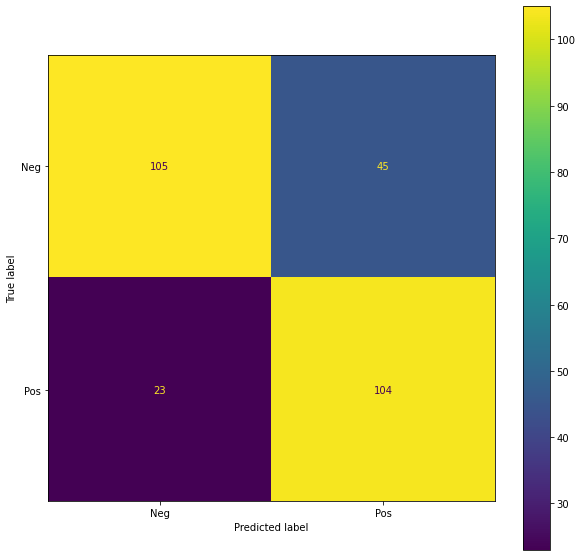

In [18]:
classifier = MultinomialNB()
classifier.fit(x_train_transformed, y_train)  #using classifier on training set only

prediction = classifier.predict(x_test_transformed) #running prediction model on test data

cf_matrix = confusion_matrix(y_test, prediction) #defining confusion matrix for prediction

test_accuracy = accuracy_score(y_test, prediction) 
training_accuracy = classifier.score(x_train_transformed, y_train) 


print('')
print('Classifier accuracy on training set: {}%'.format(round(training_accuracy*100, 2))) 
print('')
print('Classifier accuracy on test set: {}%'.format(round(test_accuracy*100, 2))) 
print('')

print(cf_matrix)

fig, ax = plt.subplots(figsize=(10, 10))
cmd = ConfusionMatrixDisplay.from_estimator(classifier, x_test_transformed, y_test, ax=ax)
plt.show(cmd)

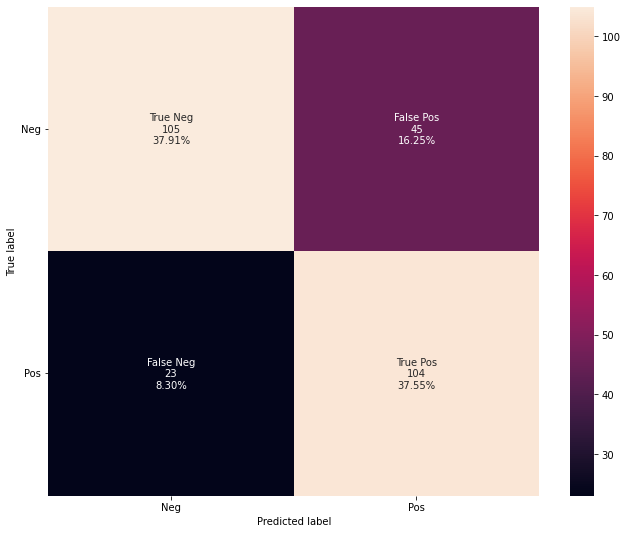

In [19]:
#reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Neg", "Pos"]


fig, ax = plt.subplots(figsize=(11,9))         
cm = sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=categories, ax=ax)
cm.set_xlabel('Predicted label')    
cm.set_ylabel('True label')
cm.set_yticklabels(categories, rotation=0, horizontalalignment='right')
plt.show(cm)

## Task 2 (4 marks)

### Improving Our Model

The approach taken in task 1 makes use of a uni-gram model, this of which analyses each individual word independently, rather than phrases. For example, under a uni-gram classifier, the phrase "I am not happy", once tokenized, would be regarded as a positive sentiment due to the presence of the word "happy". However, the reality is that this phrase has a negative cognitation, this of which is unfortunately missed by uni-gram classifiers. We can improve on the uni-gram classifier and its downfall in sentiment analysis by implementing a n-gram classifier instead. N-grams, such as bigrams and trigrams, consider words in groups of two and three, respectively, thus allowing for sentimental implementations to be more accurately represented in the model. Using our previous example, "I am not happy" would be correctly classified as negative using a bigram model which considers the phrase "not happy", thus improving model accuracy. 

In practice, perplexity is utilised as the metric for evaluating language models. The perplexity of a language model on a test set is the inverse probability of the test set, normalized by the number of words. In general, minimizing perplexity is equivalent to maximizing the test set probability according to the language model. Keeping in mind that the perplexity of two language models is only comparable if they use identical vocabularies, through previous research, it can be seen that the n-grams approach does indeed improve on classifier accuracy, but to a certain extent. In one study, unigram and bigram models run on a test set of 1.5 million words showed that perplexity decreases significantly from 962 under the unigram model, to 170 under the bigram model, hence implying greater accuracy using the latter model **[1]**. This notion is further supported by other studies which concluded that bigram models are particularly advantageous and useful once run on very large datasets **[2]** **[3]**.

As n-gram length increases, there might not always be increased accuracy; more specifically test performance will increase to a certain point (n) and decrease with increasing n afterwards. This is usually the case with sparse data, in which there is a relatively large amount of token types but each of these types has a very low frequency **[4]**.

With all of the above in mind, I will implement the following n-gram models, in order to analyse any improvements in performance:

* bigram only model (expected to show some improvement)
* trigram only model (expected to show decreased performance due to presence of sparse data)
* unigram and bigram model (expected to show most improvement as we consider individual words as well as pairs)

The procedure is generally the same, the only difference being that we now use `CountVectorizer` to specify the n-gram range to be used. For example, `ngram_range`=(2,2) indicates a bigram model whereas `ngram_range`=(1,2) indicates a unigram and bigram model; by default `ngram_range`=(1,1).



#### <u>References:</u>

**[1]** Jurafsky, D. and Martin, J., 2021. Speech and Language Processing,. 3rd ed. pp.30-54. Available from: https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf

**[2]** Bekkerman, R. and Allan, J., 2004. Using bigrams in text categorization. pp. 1-10. Technical Report IR-408, Center of Intelligent Information Retrieval, UMass Amherst. Available from: https://cs.brynmawr.edu/Courses/cs380/fall2006/ir-408.pdf

**[3]** Silge, J. and Robinson, D., 2017. Text mining with R: A tidy approach. pp. 45-68. " O'Reilly Media, Inc.". Available from: https://www.tidytextmining.com/ngrams.html

**[4]** https://stackoverflow.com/questions/36542993/when-are-uni-grams-more-suitable-than-bi-grams-or-higher-n-grams


### Bigram Only Model

In [20]:
vector1 = CountVectorizer(ngram_range=(2,2))

x1 = final_review
y1 = df.iloc[:, 0]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                        train_size = 0.8,
                                        test_size = 0.2, 
                                        random_state = 0)

x1_train_transformed = vector1.fit_transform(x1_train).toarray()  #.toarray() creates a sparse matrix (mostly contains zeroes)

x1_test_transformed = vector1.transform(x1_test).toarray()

print('The number of reviews in the training set is: ' + str(len(x1_train_transformed)) + '.')
print('The number of reviews in the test set is: ' + str(len(x1_test_transformed)) + '.')

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.



Classifier accuracy on training set: 100.0%

Classifier accuracy on test set: 77.62%

[[106  44]
 [ 18 109]]


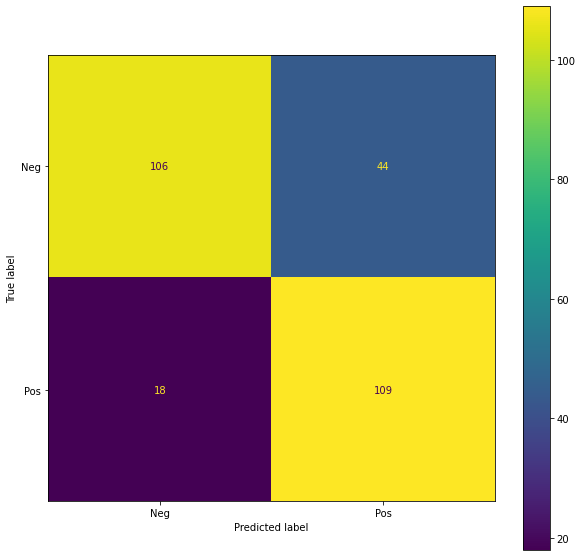

In [21]:
classifier1 = MultinomialNB()
classifier1.fit(x1_train_transformed, y1_train)  #using classifier on training set only

prediction1 = classifier1.predict(x1_test_transformed) #running prediction model on test data

cf_matrix1 = confusion_matrix(y1_test, prediction1) #defining confusion matrix for prediction

test_accuracy1 = accuracy_score(y1_test, prediction1) 
training_accuracy1 = classifier1.score(x1_train_transformed, y1_train) 


print('')
print('Classifier accuracy on training set: {}%'.format(round(training_accuracy1*100, 2))) 
print('')
print('Classifier accuracy on test set: {}%'.format(round(test_accuracy1*100, 2))) 
print('')

print(cf_matrix1)

fig, ax = plt.subplots(figsize=(10, 10))
cmd = ConfusionMatrixDisplay.from_estimator(classifier1, x1_test_transformed, y1_test, ax=ax)
plt.show(cmd)

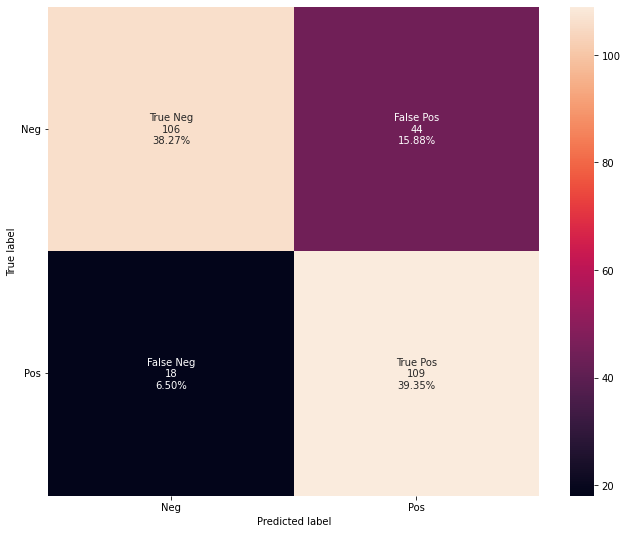

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Neg", "Pos"]


fig, ax = plt.subplots(figsize=(11,9))         
cm = sns.heatmap(cf_matrix1, annot=labels, fmt='', xticklabels=categories, ax=ax)
cm.set_xlabel('Predicted label')    
cm.set_ylabel('True label')
cm.set_yticklabels(categories, rotation=0, horizontalalignment='right')
plt.show(cm)

### Trigram Only Model


In [23]:
vector2 = CountVectorizer(ngram_range=(3,3))

x2 = final_review
y2 = df.iloc[:, 0]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                        train_size = 0.8,
                                        test_size = 0.2, 
                                        random_state = 0)

x2_train_transformed = vector2.fit_transform(x2_train).toarray()  #.toarray() creates a sparse matrix (mostly contains zeroes)

x2_test_transformed = vector2.transform(x2_test).toarray()

print('The number of reviews in the training set is: ' + str(len(x2_train_transformed)) + '.')
print('The number of reviews in the test set is: ' + str(len(x2_test_transformed)) + '.')

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.



Classifier accuracy on training set: 100.0%

Classifier accuracy on test set: 68.95%

[[ 91  59]
 [ 27 100]]


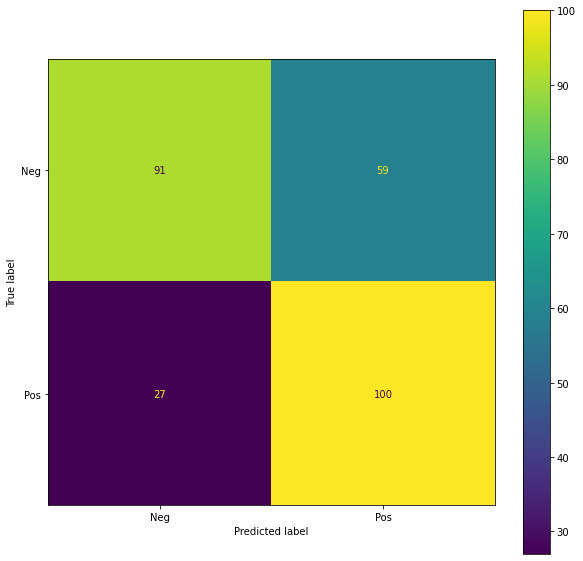

In [24]:
classifier2 = MultinomialNB()
classifier2.fit(x2_train_transformed, y2_train)  #using classifier on training set only

prediction2 = classifier2.predict(x2_test_transformed) #running prediction model on test data

cf_matrix2 = confusion_matrix(y2_test, prediction2) #defining confusion matrix for prediction

test_accuracy2 = accuracy_score(y2_test, prediction2) 
training_accuracy2 = classifier2.score(x2_train_transformed, y2_train) 


print('')
print('Classifier accuracy on training set: {}%'.format(round(training_accuracy2*100, 2))) 
print('')
print('Classifier accuracy on test set: {}%'.format(round(test_accuracy2*100, 2))) 
print('')

print(cf_matrix2)

fig, ax = plt.subplots(figsize=(10, 10))
cmd = ConfusionMatrixDisplay.from_estimator(classifier2, x2_test_transformed, y2_test, ax=ax)
plt.show(cmd)

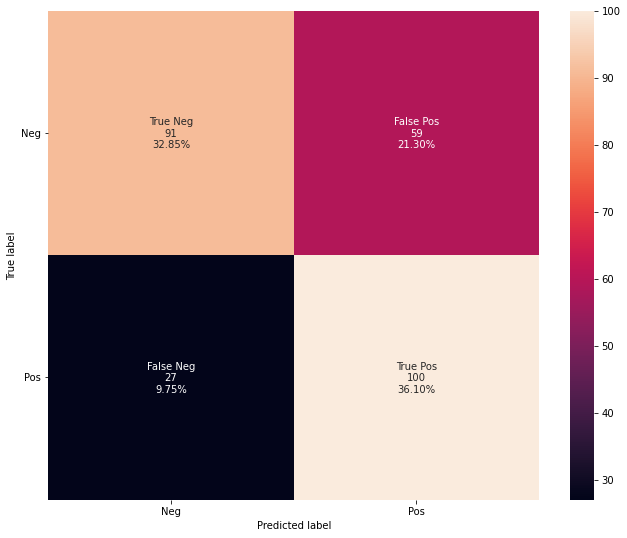

In [25]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Neg", "Pos"]


fig, ax = plt.subplots(figsize=(11,9))         
cm = sns.heatmap(cf_matrix2, annot=labels, fmt='', xticklabels=categories, ax=ax)
cm.set_xlabel('Predicted label')    
cm.set_ylabel('True label')
cm.set_yticklabels(categories, rotation=0, horizontalalignment='right')
plt.show(cm)

### Unigram and Bigram Model

In [26]:
vector3 = CountVectorizer(ngram_range=(1,2))

x3 = final_review
y3 = df.iloc[:, 0]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, 
                                        train_size = 0.8,
                                        test_size = 0.2, 
                                        random_state = 0)

x3_train_transformed = vector3.fit_transform(x3_train).toarray()  #.toarray() creates a sparse matrix (mostly contains zeroes)

x3_test_transformed = vector3.transform(x3_test).toarray()

print('The number of reviews in the training set is: ' + str(len(x3_train_transformed)) + '.')
print('The number of reviews in the test set is: ' + str(len(x3_test_transformed)) + '.')

The number of reviews in the training set is: 1105.
The number of reviews in the test set is: 277.



Classifier accuracy on training set: 100.0%

Classifier accuracy on test set: 78.7%

[[111  39]
 [ 20 107]]


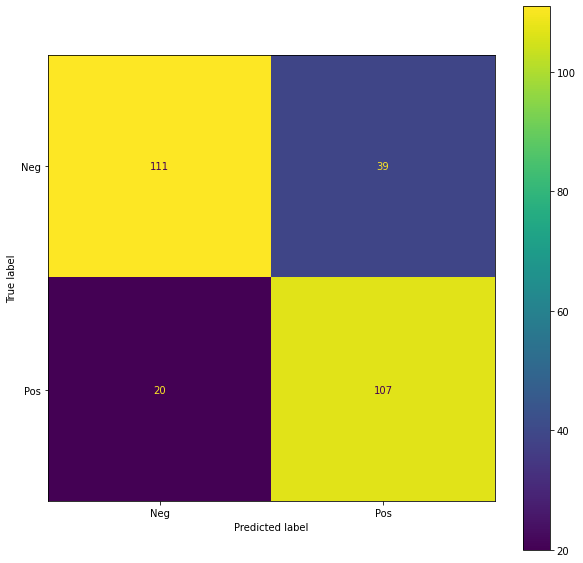

In [27]:
classifier3 = MultinomialNB()
classifier3.fit(x3_train_transformed, y3_train)  #using classifier on training set only

prediction3 = classifier3.predict(x3_test_transformed) #running prediction model on test data

cf_matrix3 = confusion_matrix(y3_test, prediction3) #defining confusion matrix for prediction

test_accuracy3 = accuracy_score(y3_test, prediction3) 
training_accuracy3 = classifier3.score(x3_train_transformed, y3_train) 


print('')
print('Classifier accuracy on training set: {}%'.format(round(training_accuracy3*100, 2))) 
print('')
print('Classifier accuracy on test set: {}%'.format(round(test_accuracy3*100, 2))) 
print('')

print(cf_matrix3)

fig, ax = plt.subplots(figsize=(10, 10))
cmd = ConfusionMatrixDisplay.from_estimator(classifier3, x3_test_transformed, y3_test, ax=ax)
plt.show(cmd)

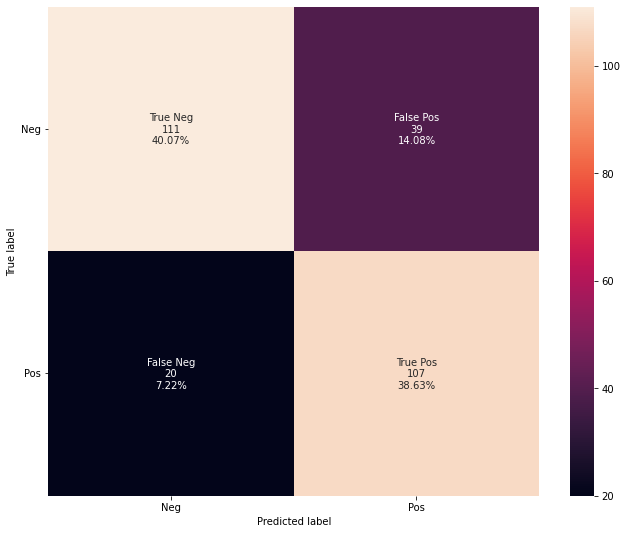

In [28]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Neg", "Pos"]


fig, ax = plt.subplots(figsize=(11,9))         
cm = sns.heatmap(cf_matrix3, annot=labels, fmt='', xticklabels=categories, ax=ax)
cm.set_xlabel('Predicted label')    
cm.set_ylabel('True label')
cm.set_yticklabels(categories, rotation=0, horizontalalignment='right')
plt.show(cm)

## Comparison of Task 1 Approach (Unigram) vs Task 2 Approach (N-gram)

We can see that the aforementioned expectations have indeed been met. In particular, the unigram and bigram approach resulted in the most improvement, increasing classifier performance from 75.45% seen in the initial unigram model to 78.7% on the test set (+ 3.25%). Likewise, the bigram only approach increased performance to 77.62% (+ 2.17%) whereas the trigram only approach saw a decreased performance of 68.95% (- 6.50%). 

Directly correlating to this improved performance, it can be observed that the proportion of False Positives and False Negatives did in fact decrease in both the bigram only and unigram and bigram models. This can possibly be explained by the previous example, where a negative sentiment may have been mistakenly considered as a positive sentiment, under the unigram only model. Conversely, decreased performance of the trigram approach relates to the increased proportion of same. In this case, this decrease was hypothesised due to the **sparsity** of the provided dataset.

While there was not a relatively significant improvement, it was still observed up to n = 2. It was noted in the previous section that the bigram approach sees better results on larger datasets, thus making it logically possible that not much improvement was seen due to the **size** of the provided dataset. 

